In [2]:
# %pip install pydicom
# %pip install opencv-python

In [3]:
from matplotlib import pyplot as plt
import os
import numpy as np
import pydicom
import CTimageLIB
import cv2

In [4]:
# The main entrance of programme
if __name__ == "__main__":
    dataPath = "./dataset/brain/DICOM/IM_0002"
    dataset = CTimageLIB.readCT(dataPath=dataPath)

In [17]:
# Output the attributes of dicom
# for attr in dataset:
#     print(attr.name, "=", attr.value)

Specific Character Set = ISO_IR 100
Image Type = ['ORIGINAL', 'PRIMARY', 'M_FFE', 'M', 'FFE']
Instance Creation Date = 20090203
Instance Creation Time = 135827
Instance Creator UID = 1.3.46.670589.11.8882.5
SOP Class UID = 1.2.840.10008.5.1.4.1.1.4
SOP Instance UID = 1.3.46.670589.11.0.0.11.4.2.0.8882.5.3680.2009020212363576412
Study Date = 20090202
Series Date = 20090202
Acquisition Date = 20090202
Content Date = 20090202
Study Time = 123306
Series Time = 123605.32000
Acquisition Time = 123605.32
Content Time = 123605.32
Accession Number = 
Modality = MR
Manufacturer = Philips Medical Systems
Institution Name = Welcome CRF
Referring Physician's Name = 
Station Name = MEDNT
Study Description = MRC44
Series Description = Survey_MST
Operators' Name = 
Admitting Diagnoses Description = 
Manufacturer's Model Name = Intera
Referenced Performed Procedure Step Sequence = [(0008, 0005) Specific Character Set              CS: ''
(0008, 0012) Instance Creation Date              DA: '20090203'
(0

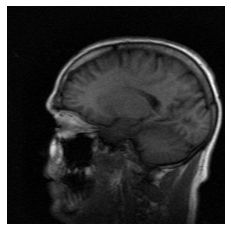

In [6]:
# Show the single image of CT dataset

# Check the avaliability of CT data
if 'PixelData' not in dataset:
    raise ValueError("DICOM file does not contain pixel data.")

# Acquire pixel data
pixels = dataset.pixel_array

# Show the image
plt.imshow(pixels, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

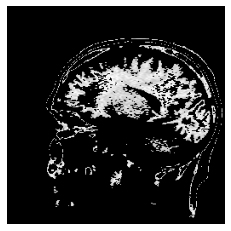

In [7]:
# Do the segmentation to extract the brain part
# Threshold segmentation
minThreshold = 150
maxThreshold = 200
brainImage = CTimageLIB.thresholdSegmentation(pixels=pixels,minThreshold=minThreshold,maxThreshold=maxThreshold)
plt.imshow(brainImage, cmap='gray')
plt.axis('off')
plt.show()

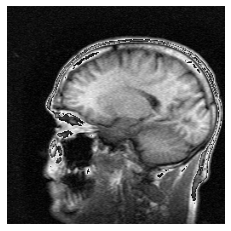

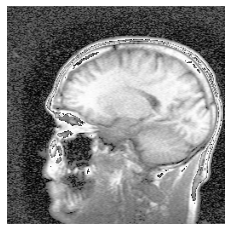

In [8]:
# Using histogram equalisation to enhance image contrast

# check the type of image
if pixels.dtype != np.uint8:
    gray_image = pixels.astype(np.uint8)

# histogram equalisation
equalized_image = cv2.equalizeHist(gray_image)

# show images
plt.imshow(gray_image, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

plt.imshow(equalized_image, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

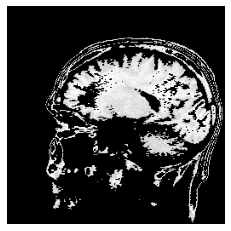

In [9]:
# Try the threshold segmentation on the processed image
minThreshold_processed = 190
maxThreshold_processed = 245
brainImage_thresholdProcessed = CTimageLIB.thresholdSegmentation(equalized_image,minThreshold_processed,maxThreshold_processed)
plt.imshow(brainImage_thresholdProcessed, cmap='gray')
plt.axis('off')
plt.show()

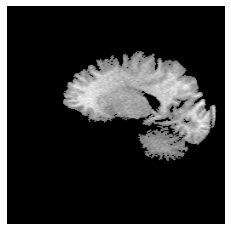

In [10]:
# Region growing method
regionGrowingImage = pixels
seedPoint = (100,100)
threshold = 95
brainImageRegionGrowing = CTimageLIB.regionGrowing(regionGrowingImage, seedPoint, threshold)
plt.imshow(brainImageRegionGrowing, cmap='gray')
plt.axis('off')
plt.show()

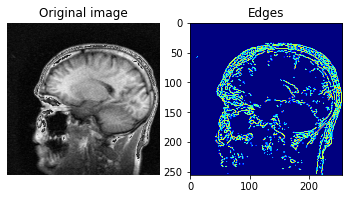

In [11]:
# Edge detection method
# Canny calculator
cannyImage = pixels
# check the type of image
if cannyImage.dtype != np.uint8:
    cannyImage = cannyImage.astype(np.uint8)
# cannyImage = cv2.equalizeHist(cannyImage)
edges = cv2.Canny(cannyImage,220,230)
plt.subplot(121)
plt.imshow(cannyImage,cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(122)
plt.imshow(edges,cmap='jet')
plt.title('Edges')
plt.show()
# print(cannyImage.shape)
# print(cannyImage)
# print(np.max(cannyImage))

(256, 256)


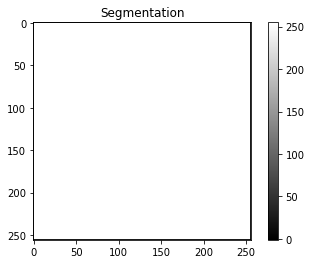

In [12]:
# Combined with the watershed
watershedImage = cv2.cvtColor(cannyImage, cv2.COLOR_GRAY2BGR)

#create the markers to record the result
markers = np.zeros_like(cannyImage, dtype=np.int32)     # the values of three channels are the same

# mark the edge as white, the value of background is 0
markers[edges != 0] = 255

# using the region growing method based on edge to do the segmentation
segmentation = cv2.watershed(watershedImage, markers)

print(segmentation.shape)
plt.imshow(segmentation, cmap='gray')
plt.title('Segmentation')
plt.colorbar()
plt.show()